In [ ]:
pip install pycaret

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load training dataset
train_df = pd.read_csv('/content/train.csv')

# Load testing dataset
test_df = pd.read_csv('/content/test.csv')

In [ ]:
# Convert 'level_group' column back to numeric
train_df['level_group'] = train_df['level_group'].replace('12-May', '5-12')
test_df['level_group'] = test_df['level_group'].replace('12-May', '5-12')

# Display the modified DataFrames

train_df.head(100)


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20100015040218188,72,109569,person_click,basic,2,NaN,-135.312298,24.867724,326.0,311.0,NaN,I knew it!,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,0,0,1,0-4
1,20100015040218188,73,111179,person_click,basic,2,NaN,-135.348261,24.855730,326.0,311.0,NaN,I'm not so sure that this is a basketball jersey.,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,0,0,1,0-4
2,20100015040218188,74,112340,person_click,basic,2,NaN,97.825855,-1.055930,488.0,329.0,NaN,"Wait, you mean Wells is wrong?!",gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,0,0,1,0-4
3,20100015040218188,75,113089,person_click,basic,2,NaN,97.825646,-1.055999,488.0,329.0,NaN,Could be. But we need evidence!,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,0,0,1,0-4
4,20100015040218188,76,114160,person_click,basic,2,NaN,97.825585,-1.056020,488.0,329.0,NaN,Why don't you head to the Basketball Center an...,gramps,tunic.historicalsociety.collection,tunic.historicalsociety.collection.gramps.found,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20100015040218188,174,268787,navigate_click,undefined,6,NaN,-36.478264,-227.818919,35.0,517.0,NaN,NaN,NaN,tunic.historicalsociety.closet_dirty,NaN,0,0,1,5-12
96,20100015040218188,175,269054,navigate_click,undefined,6,NaN,-49.133121,-230.685635,35.0,517.0,NaN,NaN,NaN,tunic.historicalsociety.closet_dirty,NaN,0,0,1,5-12
97,20100015040218188,176,269322,navigate_click,undefined,6,NaN,-85.961930,-233.555073,35.0,517.0,NaN,NaN,NaN,tunic.historicalsociety.closet_dirty,NaN,0,0,1,5-12
98,20100015040218188,177,269572,navigate_click,undefined,6,NaN,-135.601023,-235.402912,35.0,517.0,NaN,NaN,NaN,tunic.historicalsociety.closet_dirty,NaN,0,0,1,5-12


In [ ]:
test_df.head(100)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20090109393214576,95,164045,navigate_click,undefined,3,NaN,877.958258,70.273860,842.0,...,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,0,0,1,0-4,0
96,20090109393214576,96,166545,map_hover,basic,3,NaN,NaN,NaN,NaN,...,132.0,NaN,tunic.historicalsociety,tunic.historicalsociety.entry,NaN,0,0,1,0-4,0
97,20090109393214576,97,168712,map_click,undefined,3,NaN,177.121062,-163.470506,268.0,...,NaN,NaN,tunic.kohlcenter,tunic.historicalsociety.entry,NaN,0,0,1,0-4,0
98,20090109393214576,98,171211,navigate_click,undefined,3,NaN,-713.973808,-18.000000,283.0,...,NaN,NaN,NaN,tunic.kohlcenter.halloffame,NaN,0,0,1,0-4,0


In [ ]:
# Create a function to fix all of the null values
def feature_engineer(df):
    categorical_features = [f'{c}_nunique' for c in CATEGORICAL if c in df.columns]
    numerical_features = [df.groupby(['session_id', 'level_group'])[c].agg(['mean', 'std']).add_prefix(f'{c}_') for c in NUMERICAL if c in df.columns]

    dfs = [df.groupby(['session_id', 'level_group'])[c].nunique().rename(f'{c}_nunique') for c in CATEGORICAL if c in df.columns]
    dfs.extend(numerical_features)

    df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')

    return df

In [ ]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y',
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [ ]:
# Call function to fix null values
train_df = feature_engineer(train_df)
train_df.head()

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time_mean,elapsed_time_std,level_mean,level_std,...,room_coor_x_mean,room_coor_x_std,room_coor_y_mean,room_coor_y_std,screen_coor_x_mean,screen_coor_x_std,screen_coor_y_mean,screen_coor_y_std,hover_duration_mean,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20100015040218188,0-4,9,3,10,4,3,1.396680e+05,16782.914604,3.196970,0.613181,...,56.123221,395.746206,-96.518264,81.980509,507.047619,309.159549,405.793651,69.300691,2486.000000,3305.017095
20100015040218188,13-22,10,3,48,12,31,9.130371e+05,118831.145702,17.483180,2.396097,...,-221.127305,659.995957,-135.050982,215.125985,421.622951,250.095216,373.531148,108.521492,923.857143,1453.941068
20100015040218188,5-12,10,3,41,11,23,3.920783e+05,98162.059053,8.073171,2.029057,...,-71.347675,354.423563,-25.721319,140.204088,393.504630,216.555681,351.337963,124.462833,1186.862069,1477.027027
20100015125877780,0-4,10,4,22,6,11,9.615624e+04,51315.616516,1.976744,1.234055,...,37.570355,432.695595,-10.015891,146.543058,430.283333,270.406205,336.350000,115.275020,4452.125000,5080.011964
20100015125877780,13-22,10,3,60,13,34,1.253401e+06,167967.938118,17.439189,2.454945,...,-182.893228,635.819559,-151.416329,246.424471,449.765918,255.010870,384.215356,124.215755,924.298246,1257.039023


In [ ]:
labels = pd.read_csv('/content/train_labels.csv')

In [ ]:
# Split question from session_id
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )

labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [ ]:
labels.head(15)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1
5,20090314035813970_q1,1,20090314035813970,1
6,20090314121766812_q1,1,20090314121766812,1
7,20090314221187252_q1,0,20090314221187252,1
8,20090314363702160_q1,1,20090314363702160,1
9,20090314441803444_q1,1,20090314441803444,1


In [ ]:
# Combine train_df and labels based on the common identifier 'session_id' and 'session'
train_df = pd.merge(train_df, labels, left_on='session_id', right_on='session')

In [ ]:
# Setting up the Pycaret Experiment
ignore = ['session_id', 'q', 'session']

from pycaret.classification import *
exp1 = ClassificationExperiment()
exp1 = setup(train_df, target='correct',ignore_features = ignore, session_id=555)


,Description,Value
0,Session id,555
1,Target,correct
2,Target type,Binary
3,Original data shape,"(1350, 26)"
4,Transformed data shape,"(1350, 25)"
5,Transformed train set shape,"(944, 25)"
6,Transformed test set shape,"(406, 25)"
7,Ignore features,3
8,Numeric features,21
9,Categorical features,1


In [ ]:
best_models = compare_models(n_select=30)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7299,0.6594,0.8891,0.7664,0.8225,0.2626,0.2826,0.0790
dt,Decision Tree Classifier,0.7277,0.6683,0.8862,0.7662,0.8210,0.2569,0.2756,0.0760
et,Extra Trees Classifier,0.7277,0.6683,0.8862,0.7662,0.8210,0.2569,0.2756,0.3800
gbc,Gradient Boosting Classifier,0.7256,0.6679,0.8966,0.7596,0.8218,0.2355,0.2554,0.2780
ada,Ada Boost Classifier,0.7245,0.6663,0.8907,0.7614,0.8202,0.2382,0.2570,0.1980
xgboost,Extreme Gradient Boosting,0.7245,0.6693,0.8906,0.7613,0.8202,0.2391,0.2578,0.3180
rf,Random Forest Classifier,0.7235,0.6682,0.8922,0.7597,0.8200,0.2331,0.2519,0.5090
lda,Linear Discriminant Analysis,0.7235,0.6689,0.9177,0.7489,0.8244,0.2000,0.2285,0.0740
lightgbm,Light Gradient Boosting Machine,0.7235,0.6674,0.8951,0.7579,0.8202,0.2319,0.2538,0.4290
ridge,Ridge Classifier,0.7193,0.0000,0.9372,0.7377,0.8254,0.1561,0.1962,0.1100


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [ ]:
# Create Models for Top 5 Performing Models
print('Decision Tree: ')
dt = exp1.create_model('dt')
print('-------------')

print('Extra Trees: ')
et = exp1.create_model('et')
print('-------------')

print('KNN: ')
knn = exp1.create_model('knn')
print('-------------')

print('Gradient Boost: ')
gbc = exp1.create_model('gbc')
print('-------------')

print('Ada Boost')
ada = exp1.create_model('ada')

Decision Tree: 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6596,0.8209,0.7857,0.8029,0.2944,0.2953
1,0.7053,0.6495,0.8806,0.7468,0.8082,0.1900,0.2026
2,0.7263,0.6700,0.8955,0.7595,0.8219,0.2479,0.2643
3,0.7789,0.7596,0.8955,0.8108,0.8511,0.4266,0.4346
4,0.7340,0.6368,0.9104,0.7625,0.8299,0.2414,0.2628
5,0.7979,0.7438,0.9403,0.8077,0.8690,0.4380,0.4632
6,0.7021,0.6689,0.8955,0.7407,0.8108,0.1393,0.1543
7,0.7872,0.7617,0.9254,0.8052,0.8611,0.4158,0.4347
8,0.7447,0.6092,0.9701,0.7471,0.8442,0.1994,0.2677


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

-------------
Extra Trees: 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6596,0.8209,0.7857,0.8029,0.2944,0.2953
1,0.7053,0.6495,0.8806,0.7468,0.8082,0.1900,0.2026
2,0.7263,0.6700,0.8955,0.7595,0.8219,0.2479,0.2643
3,0.7789,0.7596,0.8955,0.8108,0.8511,0.4266,0.4346
4,0.7340,0.6368,0.9104,0.7625,0.8299,0.2414,0.2628
5,0.7979,0.7438,0.9403,0.8077,0.8690,0.4380,0.4632
6,0.7021,0.6689,0.8955,0.7407,0.8108,0.1393,0.1543
7,0.7872,0.7617,0.9254,0.8052,0.8611,0.4158,0.4347
8,0.7447,0.6092,0.9701,0.7471,0.8442,0.1994,0.2677


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

-------------
KNN: 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7263,0.6634,0.9104,0.7531,0.8243,0.2296,0.2523
1,0.6842,0.6602,0.8209,0.7534,0.7857,0.1899,0.1924
2,0.7368,0.6562,0.8657,0.7838,0.8227,0.3173,0.3233
3,0.7579,0.7092,0.9254,0.7750,0.8435,0.3267,0.3532
4,0.7660,0.6338,0.9254,0.7848,0.8493,0.3410,0.3654
5,0.7979,0.7112,0.9403,0.8077,0.8690,0.4380,0.4632
6,0.7128,0.6434,0.8806,0.7564,0.8138,0.2014,0.2130
7,0.7979,0.7711,0.9254,0.8158,0.8671,0.4518,0.4679
8,0.7340,0.6255,0.9701,0.7386,0.8387,0.1541,0.2190


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

-------------
Gradient Boost: 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6823,0.8507,0.7703,0.8085,0.2627,0.2677
1,0.7053,0.6431,0.9104,0.7349,0.8133,0.1496,0.1712
2,0.7263,0.6735,0.8955,0.7595,0.8219,0.2479,0.2643
3,0.7789,0.7545,0.9254,0.7949,0.8552,0.3996,0.4210
4,0.7340,0.6277,0.9104,0.7625,0.8299,0.2414,0.2628
5,0.7979,0.7582,0.9403,0.8077,0.8690,0.4380,0.4632
6,0.6702,0.6520,0.8955,0.7143,0.7947,0.0082,0.0097
7,0.7872,0.7568,0.9254,0.8052,0.8611,0.4158,0.4347
8,0.7447,0.6092,0.9701,0.7471,0.8442,0.1994,0.2677


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

-------------
Ada Boost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7158,0.6642,0.8358,0.7778,0.8058,0.2789,0.2814
1,0.7263,0.6437,0.8955,0.7595,0.8219,0.2479,0.2643
2,0.7263,0.6570,0.8955,0.7595,0.8219,0.2479,0.2643
3,0.7789,0.7439,0.8955,0.8108,0.8511,0.4266,0.4346
4,0.7340,0.6343,0.9104,0.7625,0.8299,0.2414,0.2628
5,0.7660,0.7731,0.9403,0.7778,0.8514,0.3237,0.3587
6,0.6702,0.6526,0.8955,0.7143,0.7947,0.0082,0.0097
7,0.7872,0.7413,0.9254,0.8052,0.8611,0.4158,0.4347
8,0.7447,0.6086,0.9701,0.7471,0.8442,0.1994,0.2677


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

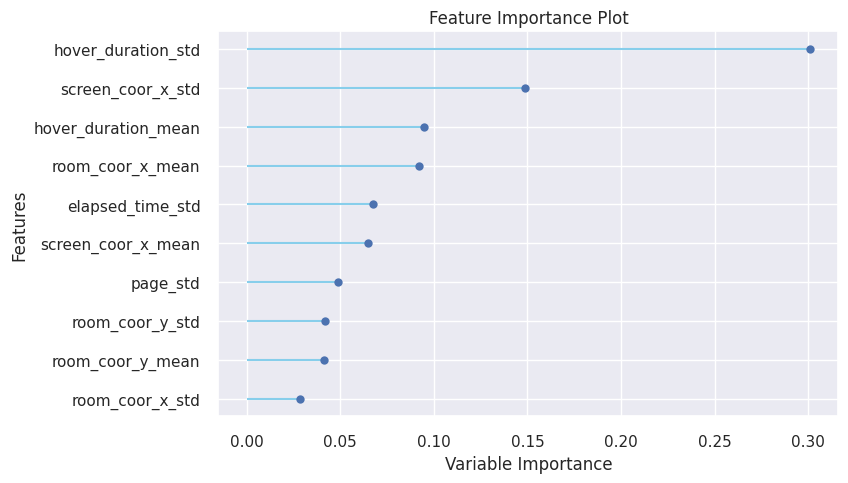

In [ ]:
exp1.plot_model(estimator = dt, plot='feature')

In [ ]:

# Select the first 10,000 records
subset_train = train_df.head(10000)

# Save the subset to a new CSV file
subset_train.to_csv('subset_train.csv', index=False)  # Replace 'path_to_subset_train.csv' with your desired file path
